In [36]:
# Session 24 -  Random Forest  Assignment by Sreedhara Jagatagar  Sreenivasa

#In this assignment students will build the random forest model after normalizing the variable to house pricing 
#from boston data set.

#Following the code to get data into the environment: 

#Load the Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#For split training and Test Data
from sklearn.model_selection import train_test_split
#Random Forest classificar
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#To evaluate accuracy score
from sklearn.metrics import accuracy_score
#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Regressions Matrix
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

#Load Data
boston = datasets.load_boston() 
features = pd.DataFrame(boston.data, columns=boston.feature_names) 
targets = boston.target 

In [2]:
#Display the Independant variables or Feaures
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Display the Target variable or Current House Price
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
#Analyze both Feature and Targe
df_analyze=features
df_analyze['Acutal_Price']= boston.target 
df_analyze.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Acutal_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


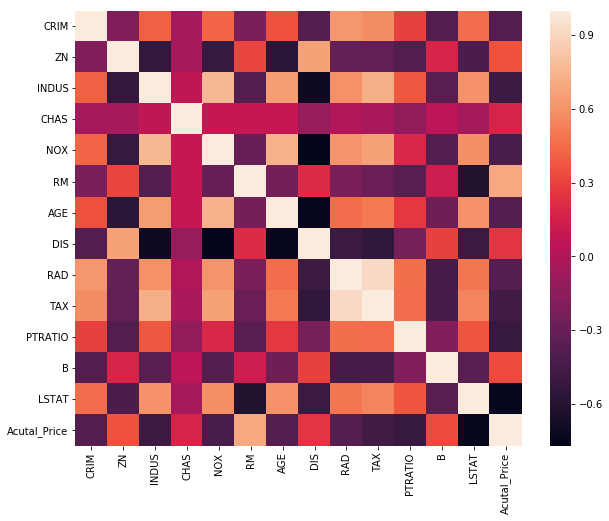

In [15]:
#Analyze Data by using Different Plot
#Show the Coorelations in the picture
plt.figure(figsize=(10,8))
sns.heatmap(df_analyze.corr())
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_analyze[boston.feature_names], df_analyze['Acutal_Price'], test_size=0.3,random_state=42)
#X_train
#X_test
#y_train
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Acutal_Price, dtype: float64

In [38]:
#Uses Random Forest Regression and Fit the train data
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [44]:
#Predict both train and test data
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

In [39]:
#Now let’s see how we do on our test set. As before we’ll compare the out-of-bag estimate 
#(this time it’s an R-squared score) to the R-squared score for our predictions. 
#We’ll also compute Spearman rank and Pearson correlation coefficients for our predictions to get a feel 
#for how we’re doing.

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.843
Test data R-2 score: 0.875
Test data Spearman correlation: 0.901
Test data Pearson correlation: 0.936


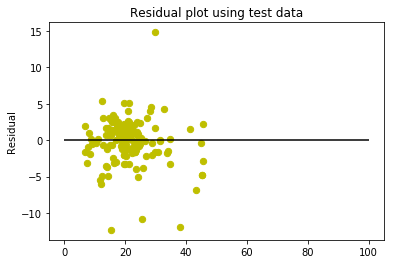

Above plot shows it is good model as residual are randomly scattered around line zero


In [41]:
#Evaluate the Model  
#Plot using Test Data with caluclated Residual
plt.scatter(predicted_test,(predicted_test-y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using test data')
plt.ylabel('Residual')
plt.show()
print('Above plot shows it is good model as residual are randomly scattered around line zero')

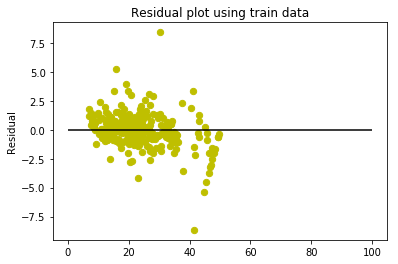

Above plot shows it is good model as residual are randomly scattered around line zero


In [45]:
#Evaluate the Model  
#Plot using Train Data with caluclated Residual
plt.scatter(predicted_train,(predicted_train-y_train),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using train data')
plt.ylabel('Residual')
plt.show()
print('Above plot shows it is good model as residual are randomly scattered around line zero')

In [69]:
#Now model is ready and predict for whole Boston Data
#Predict and display whole boston data
features['actual_price']=boston.target

#Predict and store in same data set
features['predcited_price']= rf.predict(features[boston.feature_names])

In [70]:
#Show the the predicted prices
features.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,actual_price,predcited_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,27.9982
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.8532
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7986
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,34.1336
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,35.4268
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,27.0020
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,22.1716
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,22.9204
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,16.6970
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,19.8110


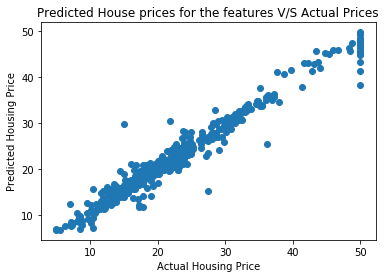

In [72]:
#Visulaize with both Actual Price and Predicted price
plt.scatter(features.actual_price,features.predcited_price)
plt.title('Predicted House prices for the features V/S Actual Prices')
plt.ylabel('Predicted Housing Price')
plt.xlabel('Actual Housing Price')
plt.show()